<a href="https://colab.research.google.com/github/vimanshu/ML/blob/main/ValidationTesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Validation sets and Test sets
# experiment with the validation set and test set
# dividing the training set into validation and smaller training set

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

In [ ]:
train_df= pd.read_csv("/content/sample_data/california_housing_train.csv")
test_df= pd.read_csv("/content/sample_data/california_housing_test.csv")

In [ ]:
# load the func for building the model
def build_model(my_learning_rate):
  model= tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(units=1,
                                  input_shape=(1,)))
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])
  return model

In [ ]:
#load the func for training the model
def train_model(model,df,feature,label, my_epochs,my_batch_size=None,my_validation_split=0.1):
  history = model.fit(x=df[feature],
                      y=df[label],
                      epochs=my_epochs,
                      validation_split=my_validation_split)
  trained_weight=model.get_weights()[0]
  trained_bias=model.get_weights()[1]
  epochs =history.epoch

  hist=pd.DataFrame(history.history)
  rmse= hist["root_mean_squared_error"]
  return epochs,rmse,history.history
  

In [ ]:
# defining the plotting function
# a loss curve-- loss v/s epochs



In [12]:
def plot_the_loss_curve(epochs, mae_training, mae_validation):
  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")
  plt.plot(epochs[1:],mae_training[1:], label="Training Loss")
  plt.plot(epochs[1:],mae_validation[1:], label="validation Loss")
  plt.legend()

  merged_mae_lists= mae_training[1:]+mae_validation[1:]
  highest_loss= max(merged_mae_lists)
  lowest_loss= min(merged_mae_lists)
  delta= highest_loss- lowest_loss
  print(delta)
  top_of_y_axis= highest_loss + (delta*0.05)
  bottom_of_y_axis= lowest_loss -(delta*0.05)

  plt.ylim([bottom_of_y_axis, top_of_y_axis])
  plt.show()


Epoch 1/30
425/425 [==============================] - 1s 1ms/step - loss: 56432204199.0610 - root_mean_squared_error: 237551.3654 - val_loss: 56911478784.0000 - val_root_mean_squared_error: 238561.2656
Epoch 2/30
425/425 [==============================] - 0s 1ms/step - loss: 56424633185.3521 - root_mean_squared_error: 237531.4229 - val_loss: 56833155072.0000 - val_root_mean_squared_error: 238397.0469
Epoch 3/30
425/425 [==============================] - 0s 1ms/step - loss: 56295810706.6291 - root_mean_squared_error: 237260.8779 - val_loss: 56754786304.0000 - val_root_mean_squared_error: 238232.6250
Epoch 4/30
425/425 [==============================] - 0s 1ms/step - loss: 55046629549.0704 - root_mean_squared_error: 234612.8457 - val_loss: 56676347904.0000 - val_root_mean_squared_error: 238067.9531
Epoch 5/30
425/425 [==============================] - 0s 1ms/step - loss: 57099952618.3662 - root_mean_squared_error: 238941.9489 - val_loss: 56598482944.0000 - val_root_mean_squared_error: 23

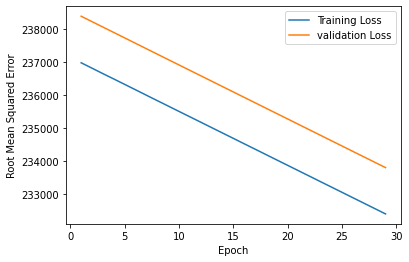

In [18]:
# hyper parameters
learning_rate=0.08
epochs= 30
batch_size= 100

validation_split=0.2
# indentifying what is the feature and label
my_feature= "median_income"
my_label="median_house_value"

my_model=None
# shuffling the data in the training set
shuff_train_df=train_df.reindex(np.random.permutation(train_df.index))
my_model= build_model(learning_rate)
epochs,rmse,history= train_model(my_model,shuff_train_df,
                                 my_feature,my_label,epochs,batch_size,validation_split)
plot_the_loss_curve(epochs,history["root_mean_squared_error"],history["val_root_mean_squared_error"])


In [14]:
n=10
train_df.head(n)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48500.0
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58400.0
9,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0


In [16]:
n=1000
train_df.head(n)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
995,-117.09,32.55,8.0,6533.0,1217.0,4797.0,1177.0,3.9583,144400.0
996,-117.10,34.57,6.0,5110.0,1044.0,1938.0,724.0,3.1917,112800.0
997,-117.10,34.21,22.0,4397.0,931.0,1145.0,445.0,4.5268,108400.0
998,-117.10,34.03,24.0,4144.0,826.0,2127.0,772.0,2.5172,96000.0


In [19]:
#using the test dataset to evaluate my model
x_test= test_df[my_feature]
y_test= test_df[my_label]
results= my_model.evaluate(x_test,y_test,batch_size=batch_size)

30/30 [==============================] - 0s 1ms/step - loss: 52916076544.0000 - root_mean_squared_error: 230034.9531
